In [30]:
#importing library and data
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv("startups final.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
X = data.iloc[: , :-1] 
y = data.iloc[: , 4]

In [32]:
states = pd.get_dummies(X['State'], drop_first = True)

In [33]:
X= X.drop('State',axis = 1)

In [34]:
X = pd.concat([X,states], axis = 1)

In [35]:
from sklearn.model_selection import train_test_split
#training the data
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)        


In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#predicting the data
y_pred = regressor.predict(X_test)


In [38]:
print(regressor.intercept_)

42554.16761773238


In [39]:
print(regressor.coef_)

[ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]


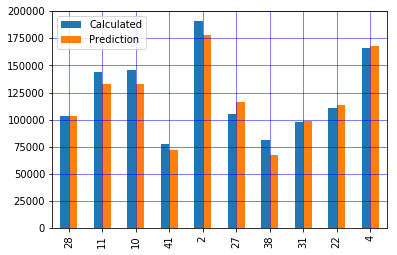

In [40]:
datf = pd.DataFrame({'Calculated': y_test, 'Prediction': y_pred})
df_1 = df
df_1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()


In [41]:
regressor.predict([[17000,20000,5000,1,0]])

array([55584.56781418])

In [42]:
import pickle
filename = 'final_model.sav'
pickle.dump(regressor, open(filename, 'wb'))